# Individual Plan

#### Github link: https://github.com/Coreeper/DSCI-Project-17

In [1]:
library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Data description

In [2]:
url_player = "https://drive.google.com/uc?export=download&id=1EDNOF0c9WQe5BaJwc-dlqKKLPObhGniP"
url_session = "https://drive.google.com/uc?export=download&id=1zNZviQwtpxZs5HitaQkeaSJ5QjPerdZ-"

In [3]:
player = read_csv (url_player)
session = read_csv (url_session)
head(player)
head(session)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### 1.1 Data Analyze For `player.csv`

In [11]:
stat_played_hour <- player |> 
summarise(min_played_hours=min(played_hours), max_played_hours=max(played_hours), mean_played_hours=mean(played_hours))

stat_age <- player |> 
summarise(min_age=min(Age,na.rm=TRUE), max_age=max(Age,na.rm=TRUE), mean_age=mean(Age,na.rm=TRUE))

stat_gender<- player |> 
distinct(gender)

stat_gender
stat_age
stat_played_hour

gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


min_age,max_age,mean_age
<dbl>,<dbl>,<dbl>
9,58,21.13918


min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


For `player.csv` , there are 196 observations and 7 columns.
1. The column `experience` is charactor type that describes the level of players as one of: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`.
2. The column `subscribe` is logical type that describes whether the player subscribed to the game info as `TRUE` and `FALSE`.
3. The column `hashedEmail` is charactor type that describes hashing encoded email address of the player.
4. The column `played_hours` is double type that describes the player's playtime on the server, ranging from 0 to 223.1, with a mean of 5.85.
5. The column `name` is charater type that describes the name of the player.
6. The column `gender` is charater type that describes the gender of the player as `male`, `female`, `Non-binary`, `Prefer not to say`, `Agender`, `Two-Spirited` and `Other`.
7. The column `Age` is double type that describes the player's age on the server, ranging from 9 to 58, with a mean of 21.14.


#### 1.2 Data Analyze For `session.csv`

In [13]:
stat_original_start_time <- session |> 
summarise(min_original_start_time=min(original_start_time), max_original_start_time=max(original_start_time), mean_original_start_time=mean(original_start_time))

stat_original_end_time <- session |> 
summarise(min_original_end_time=min(original_end_time, na.rm=TRUE), max_original_end_time=max(original_end_time, na.rm=TRUE), mean_original_end_time=mean(original_end_time, na.rm=TRUE))

stat_original_start_time
stat_original_end_time

min_original_start_time,max_original_start_time,mean_original_start_time
<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12


min_original_end_time,max_original_end_time,mean_original_end_time
<dbl>,<dbl>,<dbl>
1.7124e+12,1.72734e+12,1.719196e+12


For `session.csv` , there are 1535 observations and 5 columns.
1. The column `hashedEmail` is charactor type that describes hashed email address of the player.
2. The column `start_time` is charactor type that describes the time when the player starts to play on the server.
3. The column `end_time` is charactor type that describes the time when the player leave the server.
4. The column `original_start_time` is double type that uses the millisecond-precision Unix timestamps to describe the time when the player starts to play on the server, ranging from 1.7124e+12 to 1.72733e+12, with a mean of 1.719201e+12.
5. The column `original_end_time` is double type that uses the millisecond-precision Unix timestamps to describe the time when the player leave the server, ranging from 1.7124e+12 to 1.72734e+12, with a mean of 1.719196e+12.

#### 1.3 Potential Issues

In [7]:
count_gender <- player|>
group_by(gender)|>
summarise(count=n())

count_gender 

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


1. The gender distribution is not even. The number of `male` testers far exceeds the number of testers of any other `gender`.
2. We may need to change the data type of some columns due to the choosen of predictors and response variables.

## 2. Question

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

I will choose to answer question 2.   
To be more specific, I will try to use `experience`, `gender` and `age` to predict `played_hours`.  
We can build a regression model since the response variable`played_hours` is numerical. Before using this model, we need to convert the data type of `experience` and `gender` from character to numerical. We can do so by assigning value to the column according to the type in `experience` and `gender`.   
For example of `experience`, we can let `Pro`=1, `Veteran`=2, `Amateur`=3, `Regular`=4, and `Beginner`=5. For `gender`, we can let `male`=1, `female`=2, `Non-binary`=3, `Prefer not to say`=4, `Agender`=5, `Two-Spirited`=6 and `Other`=7.

## 3. Exploratory Data Analysis and Visualization

#### 3.1 Exploratory Data

The steps of exploratory data are completed in 1.1 Data Analyze for `player.csv` and 1.2 Data Analyze for `session.csv`.

In [14]:
stat_age
stat_played_hour
stat_original_start_time
stat_original_end_time

min_age,max_age,mean_age
<dbl>,<dbl>,<dbl>
9,58,21.13918


min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


min_original_start_time,max_original_start_time,mean_original_start_time
<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12


min_original_end_time,max_original_end_time,mean_original_end_time
<dbl>,<dbl>,<dbl>
1.7124e+12,1.72734e+12,1.719196e+12


#### 3.2 Visualization

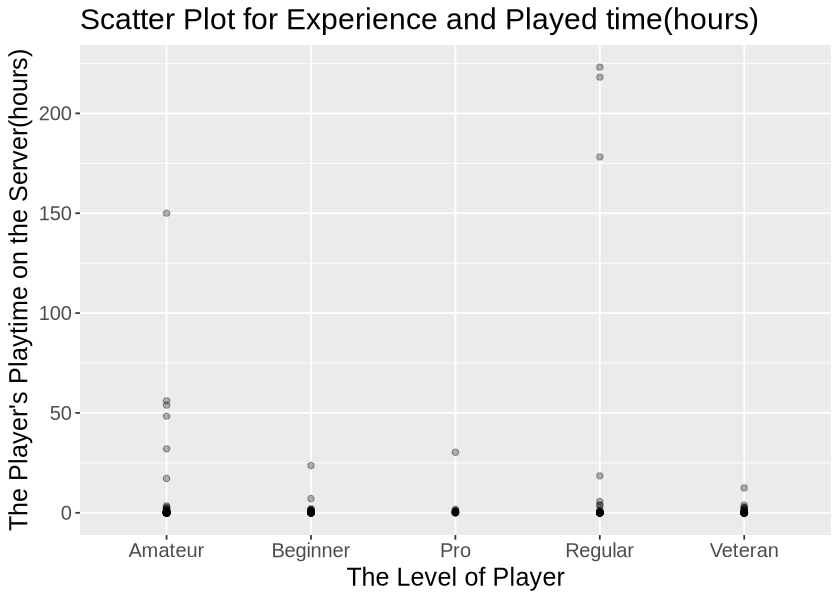

In [52]:
options(repr.plot.width = 7, repr.plot.height = 5) 
experience_vs_played_hours <- ggplot(player, aes(x = experience,
                     y = played_hours)) +
  geom_point(alpha=0.3) +
  xlab("The Level of Player") +
  ylab("The Player's Playtime on the Server(hours)") +
  ggtitle("Scatter Plot for Experience and Played time(hours)")+
  theme(text = element_text(size = 15))
experience_vs_played_hours

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


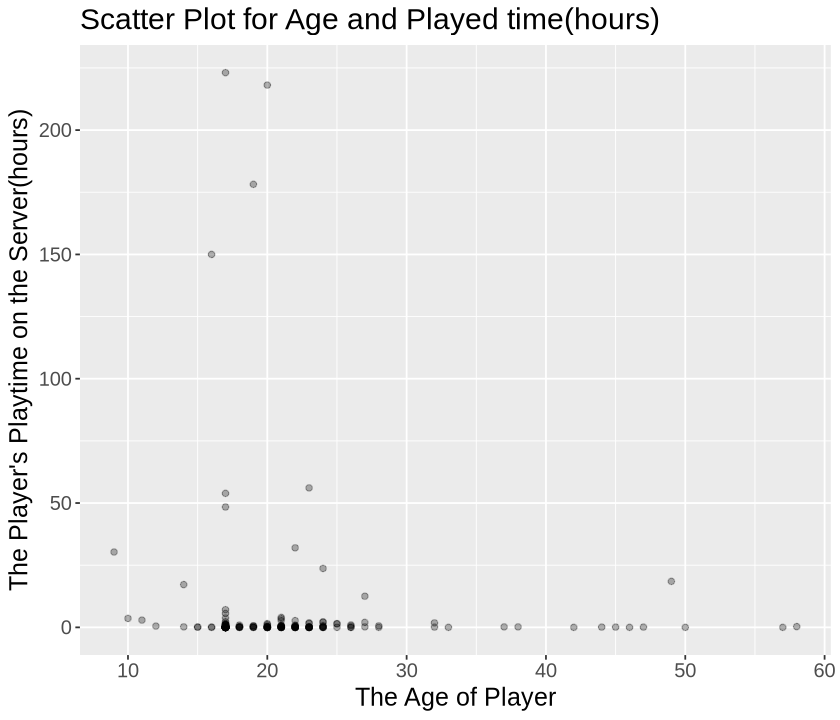

In [69]:
options(repr.plot.width = 7, repr.plot.height = 6) 
age_vs_played_hours <- ggplot(player, aes(x = Age,
                     y = played_hours)) +
  geom_point(alpha=0.3) +
  xlab("The Age of Player") +
  ylab("The Player's Playtime on the Server(hours)") +
  ggtitle("Scatter Plot for Age and Played time(hours)")+
  theme(text = element_text(size = 15))
age_vs_played_hours

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


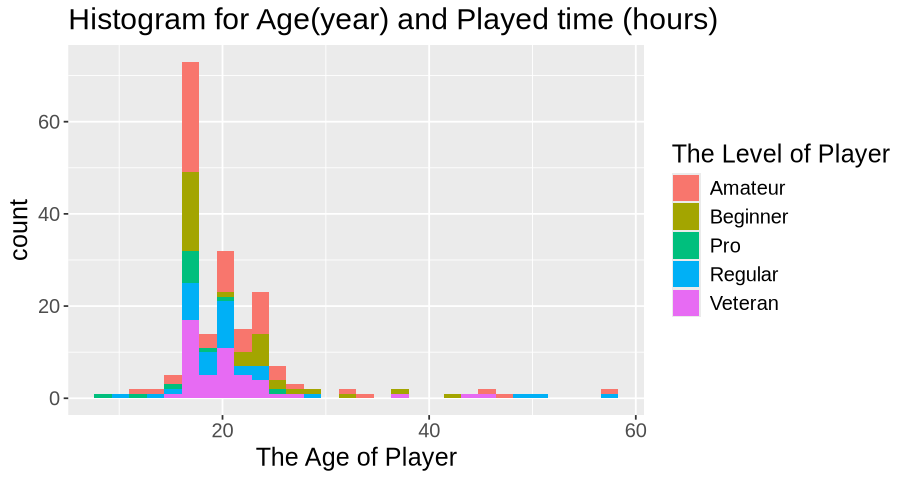

In [70]:
options(repr.plot.width = 7.5, repr.plot.height = 4) 
age_vs_played_hours <- ggplot(player, aes(x = Age, fill=experience)) +
  geom_histogram() +
ggtitle("Histogram for Age(year) and Played time (hours)")+
  xlab("The Age of Player") +
  labs(fill="The Level of Player")+
  theme(text = element_text(size = 15))

age_vs_played_hours

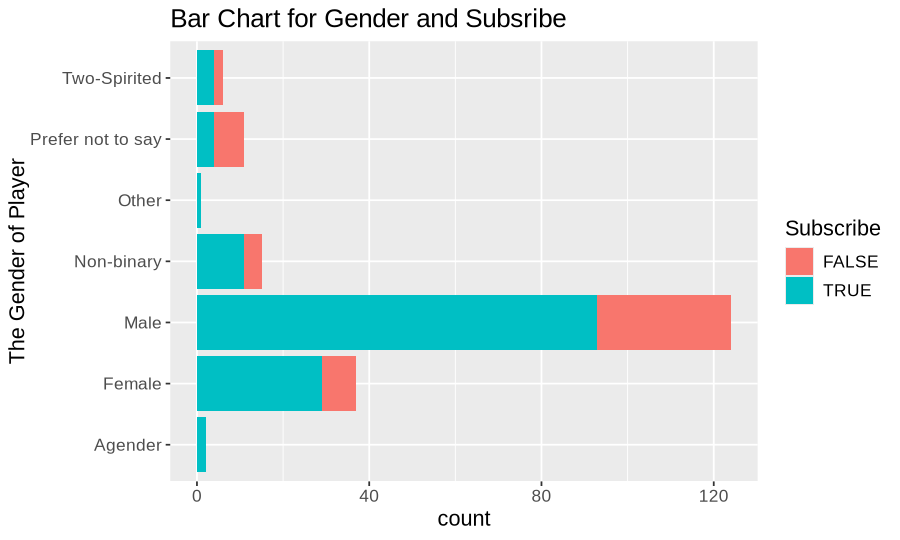

In [63]:
options(repr.plot.width = 7.5, repr.plot.height = 4.5) 
gender_vs_subscribe <- ggplot(player, aes(y = gender, fill=subscribe)) +
  geom_bar() +
ggtitle("Bar Chart for Gender and Subsribe")+
  ylab("The Gender of Player") +
  labs(fill="Subscribe")+
  theme(text = element_text(size = 13))

gender_vs_subscribe

We can find that `experience` and `Age` is related to `played_hours`, so that we can use `experience` and `Age` as predictors to predict `played_hours`. For `gender`, except for`Male` and `Female`, the amount of data for other genders is relatively small. We can try merging some genders.

## 4. Methods and Plan

We can build a regression model since the response variable`played_hours` is numerical. We can perform both the knn-regression model and the linear regression model, and choose the best model by comparing their error.   
We assume that `experience` `gender` and `Age`are related to `played_hours`.

For the knn-regression model, it may perform weak when predicting new observations in areas that lack data.   
For the linear regression model, it may become overfit.

I will split the data into 25% testing data and 75% training data.  
For knn-regression model, I will use `tune()` build knn model based on the training data with different k.I will use cross validation to compare the accurany of these models when they are predicting the testing data. Then I will choose the best k with highest accurancy for knn-regressison.  
For linear regression model, I will build models based on the training set. Then I will use cross validation to compare the RMSPE of these models when they are predicting the testing data. I will choose the model with lowest RMSPE.

Eventually, I will compare the performance of the best knn-regression model and the best linear regression model to choose the final model based on their error on the testing data.